<a href="https://colab.research.google.com/github/mshitie/MS_KD/blob/main/temperature/Temperature_100.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install rarfile

from google.colab import drive
import rarfile
import os

# Mount Google Drive
drive.mount('/content/drive')

# Path to the .rar file in Google Drive
rar_path = '/content/drive/MyDrive/computer_vision/main_data_croped.rar'

# Destination folder to extract the contents
destination_folder = '/content'

# Create the destination folder if it doesn't exist
if not os.path.exists(destination_folder):
    os.makedirs(destination_folder)

# Extract the .rar file
with rarfile.RarFile(rar_path, 'r') as rar_ref:
    rar_ref.extractall(destination_folder)

print("Extraction completed.")

Mounted at /content/drive
Extraction completed.


In [2]:
import os
import csv
import shutil

def partition_images(directory, csv_file, output_folder):
    image_files = []
    folder_counts = {}  # Dictionary to store the count of images moved to each folder

    # Read the CSV file
    with open(csv_file, 'r') as file:
        reader = csv.reader(file)
        header = next(reader, None)  # Skip the header row if it exists

        # Iterate over the rows in the CSV file
        for row in reader:
            image_file = row[0]  # Assuming the image file names are in the first column
            label = row[1]  # Assuming the labels are in the second column
            image_files.append((image_file, label))

    # Create directories for each label
    labels = set(label for _, label in image_files)
    for label in labels:
        label_dir = os.path.join(output_folder, label)
        os.makedirs(label_dir, exist_ok=True)
        folder_counts[label] = 0  # Initialize the count to 0

    # Move the image files to separate label directories
    for image_file, label in image_files:
        source_path = os.path.join(directory, image_file + ".jpg")  # Assuming the file extension is '.jpg'
        destination_path = os.path.join(output_folder, label, image_file + ".jpg")

        if os.path.exists(source_path):
            print(f"Moving {source_path} to {destination_path}")
            shutil.move(source_path, destination_path)
            folder_counts[label] += 1  # Increment the count for the corresponding folder

        else:
            print(f"File not found: {source_path}")

    # Print the counts for each folder
    print("\nNumber of images moved in each folder:")
    for label, count in folder_counts.items():
        print(f"{label}: {count}")

# Directory path where the images and CSV file are located
directory_path = '/content/main_data_croped/'
csv_file_path = '/content/drive/MyDrive/computer_vision/tfti2.csv'
output_folder = "/content/main_data_croped2/"

# Create the output directory if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Call the function to partition the images based on the labels
partition_images(directory_path, csv_file_path, output_folder)

Moving /content/main_data_croped/image1.jpg to /content/main_data_croped2/1/image1.jpg
Moving /content/main_data_croped/image2.jpg to /content/main_data_croped2/2/image2.jpg
Moving /content/main_data_croped/image3.jpg to /content/main_data_croped2/1/image3.jpg
Moving /content/main_data_croped/image4.jpg to /content/main_data_croped2/1/image4.jpg
Moving /content/main_data_croped/image5.jpg to /content/main_data_croped2/2/image5.jpg
Moving /content/main_data_croped/image6.jpg to /content/main_data_croped2/3/image6.jpg
Moving /content/main_data_croped/image7.jpg to /content/main_data_croped2/1/image7.jpg
Moving /content/main_data_croped/image8.jpg to /content/main_data_croped2/4/image8.jpg
Moving /content/main_data_croped/image9.jpg to /content/main_data_croped2/1/image9.jpg
Moving /content/main_data_croped/image10.jpg to /content/main_data_croped2/4/image10.jpg
Moving /content/main_data_croped/image11.jpg to /content/main_data_croped2/2/image11.jpg
Moving /content/main_data_croped/image1

In [3]:
import os
import cv2
from PIL import Image
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn')
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import auc, roc_curve
from tqdm import tqdm

import time

<ipython-input-3-24a99c24d72f>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [4]:
import keras
import tensorflow as tf
from keras import layers
from keras.models import Model
from keras.layers import Lambda, concatenate
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import GlobalAveragePooling2D , Conv2D , MaxPooling2D
from keras.layers import  Dropout , BatchNormalization , Dense
from keras.optimizers import Adam
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.callbacks import Callback , ReduceLROnPlateau , ModelCheckpoint
from sklearn.metrics import cohen_kappa_score, accuracy_score
from keras.losses import categorical_crossentropy as logloss
from keras.metrics import categorical_accuracy

In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

train_dir = '/content/main_data_croped2'

# Load train images
tf_train = []
for filename in os.listdir(os.path.join(train_dir, 'TF')):
    img = Image.open(os.path.join(train_dir, 'TF', filename)).convert('RGB')
    img = img.resize((224, 224))  # Resize if necessary
    img_array = np.array(img)
    tf_train.append(img_array)
tf_train = np.array(tf_train)

it_train = []
for filename in os.listdir(os.path.join(train_dir, 'TI')):
    img = Image.open(os.path.join(train_dir, 'TI', filename)).convert('RGB')
    img = img.resize((224, 224))  # Resize if necessary
    img_array = np.array(img)
    it_train.append(img_array)
it_train = np.array(it_train)

normal_train = []
for filename in os.listdir(os.path.join(train_dir, 'normal')):
    img = Image.open(os.path.join(train_dir, 'normal', filename)).convert('RGB')
    img = img.resize((224, 224))  # Resize if necessary
    img_array = np.array(img)
    normal_train.append(img_array)
normal_train = np.array(normal_train)

print('Done Loaded :)')

# Shape of our dataset
print(f'TF Train:', tf_train.shape)
print(f'TI Train:', it_train.shape)
print(f'Normal Train:', normal_train.shape)

tf_train_label = np.zeros(len(tf_train), dtype=float)
it_train_label = np.ones(len(it_train), dtype=float)
normal_train_label = np.full(len(normal_train), 2, dtype=float)

X_train = np.concatenate((tf_train, it_train, normal_train), axis=0)
Y_train = np.concatenate((tf_train_label, it_train_label, normal_train_label), axis=0)

s = np.arange(X_train.shape[0])
np.random.shuffle(s)
X_train = X_train[s]
Y_train = Y_train[s]

Y_train = to_categorical(Y_train, num_classes=3)

print(f'X train shape:', X_train.shape)
print(f'Y train shape:', Y_train.shape)

# Split the data into training, validation, and testing sets
x_train, x_temp, y_train, y_temp = train_test_split(X_train, Y_train, test_size=0.2, random_state=10)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=10)

print(f'x train shape:', x_train.shape)
print(f'x test shape:', x_test.shape)
print(f'x val shape:', x_val.shape)
print(f'y train shape:', y_train.shape)
print(f'y test shape:', y_test.shape)
print(f'y val shape:', y_val.shape)

Done Loaded :)
TF Train: (365, 224, 224, 3)
TI Train: (110, 224, 224, 3)
Normal Train: (1019, 224, 224, 3)
X train shape: (1494, 224, 224, 3)
Y train shape: (1494, 3)
x train shape: (1195, 224, 224, 3)
x test shape: (150, 224, 224, 3)
x val shape: (149, 224, 224, 3)
y train shape: (1195, 3)
y test shape: (150, 3)
y val shape: (149, 3)


In [6]:
# Teacher model with ResNet50
def build_model(backbone , lr = 1e-4):
  model = Sequential()
  model.add(backbone)
  model.add(layers.GlobalAveragePooling2D())
  model.add(layers.Dropout(0.5))
  model.add(layers.BatchNormalization())
  model.add(layers.Dense(3 , activation='softmax'))

  model.compile(
        loss='categorical_crossentropy',
        optimizer=Adam(learning_rate=lr),
        metrics=['accuracy']
    )

  return model


resnet = ResNet50(
    weights = 'imagenet',
    include_top = False,
    input_shape =(224 , 224 , 3)
)
#call the model
model = build_model(resnet , lr = 1e-4)
model.build((None, 224, 224, 3))
model.summary()

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_average_pooling2d (  (None, 2048)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dropout (Dropout)           (None, 2048)              0         
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 3)                 6147      
                                                         

In [7]:
# Training the teacher model with Resnet50
# Train the teacher model as usual
epochs = 10
batch_size = 64
teacher_his = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, y_val))

Epoch 1/10
19/19 [==============================] - 67s 882ms/step - loss: 1.1632 - accuracy: 0.5665 - val_loss: 1.1106 - val_accuracy: 0.4430
Epoch 2/10
19/19 [==============================] - 11s 589ms/step - loss: 0.5024 - accuracy: 0.8418 - val_loss: 1.0663 - val_accuracy: 0.5168
Epoch 3/10
19/19 [==============================] - 11s 580ms/step - loss: 0.1387 - accuracy: 0.9565 - val_loss: 1.6285 - val_accuracy: 0.5168
Epoch 4/10
19/19 [==============================] - 11s 584ms/step - loss: 0.0793 - accuracy: 0.9766 - val_loss: 1.6419 - val_accuracy: 0.5973
Epoch 5/10
19/19 [==============================] - 11s 599ms/step - loss: 0.0485 - accuracy: 0.9874 - val_loss: 1.3360 - val_accuracy: 0.6980
Epoch 6/10
19/19 [==============================] - 11s 589ms/step - loss: 0.0215 - accuracy: 0.9975 - val_loss: 1.1610 - val_accuracy: 0.7450
Epoch 7/10
19/19 [==============================] - 11s 604ms/step - loss: 0.0121 - accuracy: 0.9975 - val_loss: 1.5059 - val_accuracy: 0.7315

In [8]:
Y_val_pred = model.predict(x_val)
print(f'The Accuracy on the Validation Set:',accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1)))

5/5 [==============================] - 2s 67ms/step
The Accuracy on the Validation Set: 0.7516778523489933


In [9]:
#Now let's check my Y_test values
print(f'My Y_test values are:\n' ,y_test)

My Y_test values are:
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 

In [10]:
#Now let's check my predcited values from X_test dataset
import timeit

start = timeit.default_timer()
#Your statements here
y_pred = model.predict(x_test)
print(f'My predicted Y_test values are:\n' ,y_pred)

stop = timeit.default_timer()
print('\nTime: ',stop - start,'sec')

5/5 [==============================] - 2s 416ms/step
My predicted Y_test values are:
 [[1.36518329e-01 4.28032167e-02 8.20678532e-01]
 [3.15106334e-03 1.83364395e-02 9.78512526e-01]
 [8.64662945e-01 2.11371407e-02 1.14199877e-01]
 [7.33132707e-03 4.26756823e-03 9.88401175e-01]
 [9.99999404e-01 5.38977247e-07 2.16068726e-24]
 [8.96986458e-05 2.40610423e-03 9.97504175e-01]
 [6.67723715e-02 1.20599627e-01 8.12628031e-01]
 [2.15979610e-02 7.66711170e-03 9.70734954e-01]
 [9.99006093e-01 6.00144267e-04 3.93811177e-04]
 [1.29788427e-03 7.80479237e-03 9.90897357e-01]
 [4.34754118e-02 3.32683958e-02 9.23256218e-01]
 [9.99640584e-01 3.59400176e-04 6.93699320e-10]
 [9.99999881e-01 8.83989699e-08 3.10989114e-27]
 [1.32914970e-03 3.74458125e-03 9.94926214e-01]
 [9.98895228e-01 1.10480504e-03 1.84499291e-11]
 [1.22844055e-03 1.63852458e-03 9.97133017e-01]
 [9.34379399e-01 3.66994850e-02 2.89211664e-02]
 [8.03745806e-01 1.86683863e-01 9.57037136e-03]
 [4.08918975e-04 7.44508288e-04 9.98846531e-01]
 [

In [11]:
#Now let's check the accuracy between the original & predicted (Y_test , y_pred)
print(f'My accuracy on Teacher model with ResNet50 on the Test set is:',accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

My accuracy on Teacher model with ResNet50 on the Test set is: 0.78


In [12]:
# Print the classification report
print(classification_report( np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.54      0.81      0.64        36
           1       0.57      0.67      0.62         6
           2       0.94      0.78      0.85       108

    accuracy                           0.78       150
   macro avg       0.68      0.75      0.70       150
weighted avg       0.83      0.78      0.79       150



In [13]:
# Define the student model
# Student model that is stand-alone. We will evaluate its accuracy compared to a teacher trained student model
# Hyperparameters
input_shape = (224, 224, 3) # Input shape of each image
nb_classes = 3


student = Sequential()
student.add(Conv2D(128, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(Conv2D(64, (3, 3), activation='relu'))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(Conv2D(32, (3, 3), activation='relu'))
student.add(Dropout(0.25)) # For reguralization

student.add(layers.Flatten())

student.add(layers.Dense(nb_classes))
student.add(layers.Activation('softmax')) # Note that we add a normal softmax layer to begin with


student.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

print(student.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)     0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 dropout_1 (Dropout)         (None, 52, 52, 32)       

In [14]:
#Collect the logits from the previous layer output and store it in a different model
teacher_WO_Softmax = Model(model.input, model.get_layer('dense').output)

In [15]:
# Define a manual softmax function
def softmax(x):
    return np.exp(x)/(np.exp(x).sum())

# Temperature = 100

In [16]:
# Prepare the soft targets and the target data for student to be trained upon
temp = 100
# This model directly gives the logits ( see the teacher_WO_softmax model above)
teacher_train_logits = teacher_WO_Softmax.predict(x_train)
teacher_test_logits = teacher_WO_Softmax.predict(x_val)

# Perform a manual softmax at raised temperature
train_logits_T = teacher_train_logits/temp # temp = 100
test_logits_T = teacher_test_logits/temp

Y_train_soft = softmax(train_logits_T)
Y_test_soft = softmax(test_logits_T)

# Concatenate
Y_train_new = np.concatenate([y_train, Y_train_soft], axis=1)
Y_test_new =  np.concatenate([y_val, Y_test_soft], axis =1)

#Print the Shape
print(train_logits_T.shape)
print(test_logits_T.shape)
print(Y_train_new.shape)
print(Y_test_new.shape)

5/5 [==============================] - 0s 81ms/step
(1195, 3)
(149, 3)
(1195, 6)
(149, 6)


In [17]:
# Prepare the student model that outputs probabilities with and without temperature
# Remove the softmax layer from the student network
temp = 100
student.layers.pop()

# Now collect the logits from the last layer
# This is going to be a tensor. And hence it needs to pass through a Activation layer
logits = student.layers[-1].output
probs = layers.Activation('softmax')(logits)


# softed probabilities at raised temperature
logits_T = Lambda(lambda x: x / temp)(logits)
probs_T = layers.Activation('softmax')(logits_T)

output = concatenate([probs, probs_T])

# This is our new student model
student = Model(student.input, output)

student.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_input (InputLayer)   [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 222, 222, 128)        3584      ['conv2d_input[0][0]']        
                                                                                                  
 max_pooling2d (MaxPooling2  (None, 111, 111, 128)        0         ['conv2d[0][0]']              
 D)                                                                                               
                                                                                                  
 conv2d_1 (Conv2D)           (None, 109, 109, 64)         73792     ['max_pooling2d[0][0]'] 

In [18]:
# Declare knowledge distillation loss function
# This will be a teacher trained student model.
# This uses a knowledge distillation loss function

# Declare knowledge distillation loss
def knowledge_distillation_loss(y_true, y_pred, alpha):

    # Extract the one-hot encoded values and the softs separately so that we can create two objective functions
    y_true, y_true_softs = y_true[: , :nb_classes], y_true[: , nb_classes:]

    y_pred, y_pred_softs = y_pred[: , :nb_classes], y_pred[: , nb_classes:]

    loss = alpha*logloss(y_true,y_pred) + (1-alpha)*logloss(y_true_softs, y_pred_softs)

    return loss

# For testing use regular output probabilities - without temperature
def acc(y_true, y_pred):
    y_true = y_true[:, :nb_classes]
    y_pred = y_pred[:, :nb_classes]
    return categorical_accuracy(y_true, y_pred)

student.compile(
    #optimizer=optimizers.SGD(lr=1e-1, momentum=0.9, nesterov=True),
    optimizer='adadelta',
    loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, 0.1),
    #loss='categorical_crossentropy',
    metrics=[acc] )

In [19]:
# Train the student model
epochs = 20
batch_size = 64
student_his = student.fit(x_train, Y_train_new,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, Y_test_new))

Epoch 1/20
19/19 [==============================] - 18s 689ms/step - loss: 0.1335 - acc: 0.2092 - val_loss: 0.1369 - val_acc: 0.2483
Epoch 2/20
19/19 [==============================] - 9s 476ms/step - loss: 0.1060 - acc: 0.4921 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 3/20
19/19 [==============================] - 9s 479ms/step - loss: 0.0884 - acc: 0.6762 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 4/20
19/19 [==============================] - 9s 479ms/step - loss: 0.0883 - acc: 0.6753 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 5/20
19/19 [==============================] - 9s 479ms/step - loss: 0.0883 - acc: 0.6762 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 6/20
19/19 [==============================] - 9s 477ms/step - loss: 0.0881 - acc: 0.6787 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 7/20
19/19 [==============================] - 9s 479ms/step - loss: 0.0880 - acc: 0.6787 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 8/20
19/19 [==============================] - 9s 476ms/step - loss: 0

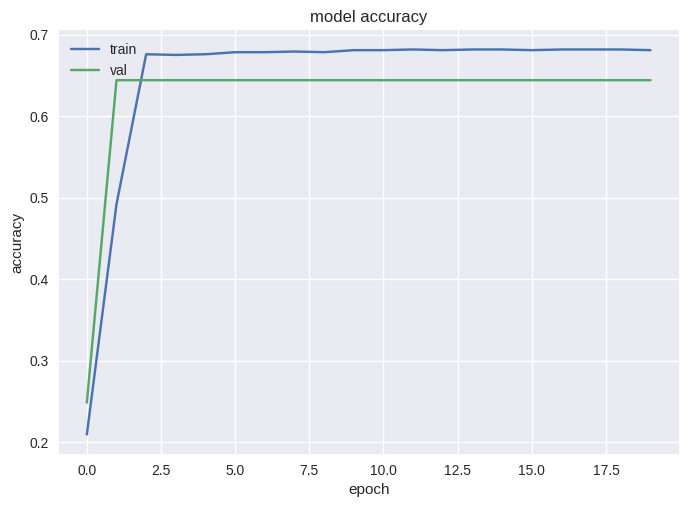

In [20]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for accuracy
plt.plot(student_his.history['acc'])
plt.plot(student_his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

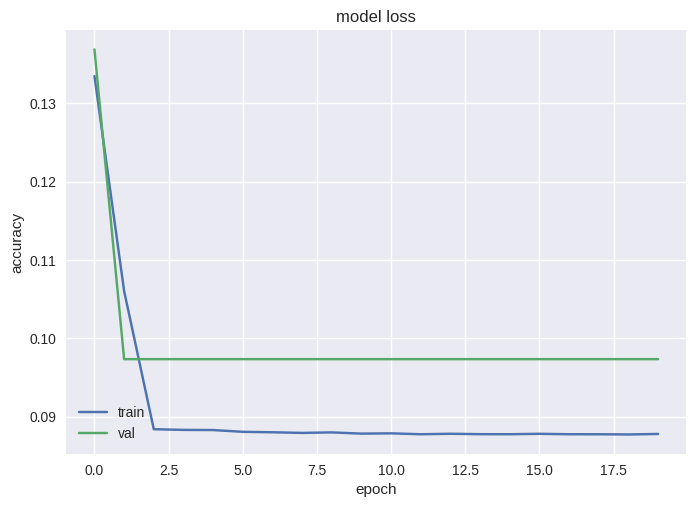

In [21]:
#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for accuracy
plt.plot(student_his.history['loss'])
plt.plot(student_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

In [22]:
Y_val_pred = student.predict(x_val)
print(f'The Accuracy on the Validation Set:',accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1)))

5/5 [==============================] - 1s 18ms/step
The Accuracy on the Validation Set: 0.6442953020134228


In [24]:
#Now let's check my Y_test values
print(f'My Y_test values are:\n' ,y_test)

My Y_test values are:
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 

In [25]:
#Now let's check my predcited values from X_test dataset
import timeit

start = timeit.default_timer()
#Your statements here
y_pred = student.predict(x_test)
print(f'My predicted Y_test values are:\n' ,y_pred)

stop = timeit.default_timer()
print('\nTime: ',stop - start,'sec')

5/5 [==============================] - 1s 208ms/step
My predicted Y_test values are:
 [[0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21

In [26]:
#Now let's check the accuracy between the original & predicted (Y_test , y_pred)
print(f'My accuracy on Teacher model with ResNet50 on the Test set is:',accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

My accuracy on Teacher model with ResNet50 on the Test set is: 0.72


In [27]:
# Print the classification report
print(classification_report( np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00         6
           2       0.72      1.00      0.84       108

    accuracy                           0.72       150
   macro avg       0.24      0.33      0.28       150
weighted avg       0.52      0.72      0.60       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:

# Define the student model
# Student model that is stand-alone. We will evaluate its accuracy compared to a teacher trained student model
# Hyperparameters
input_shape = (224, 224, 3) # Input shape of each image
nb_classes = 3


student = Sequential()
student.add(Conv2D(128, kernel_size=(3, 3),activation='relu', input_shape=input_shape))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(Conv2D(64, (3, 3), activation='relu'))
student.add(MaxPooling2D(pool_size=(2, 2)))
student.add(Conv2D(32, (3, 3), activation='relu'))
student.add(Dropout(0.25)) # For reguralization

student.add(layers.Flatten())

student.add(layers.Dense(nb_classes))
student.add(layers.Activation('softmax')) # Note that we add a normal softmax layer to begin with


student.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

print(student.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 128)     3584      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 128)     0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      73792     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 52, 52, 32)        18464     
                                                                 
 dropout_3 (Dropout)         (None, 52, 52, 32)       

In [45]:
#Collect the logits from the previous layer output and store it in a different model
teacher_WO_Softmax = Model(model.input, model.get_layer('dense').output)

In [46]:
# Define a manual softmax function
def softmax(x):
    return np.exp(x)/(np.exp(x).sum())


In [47]:

# Prepare the soft targets and the target data for student to be trained upon
temp = 100
# This model directly gives the logits ( see the teacher_WO_softmax model above)
teacher_train_logits = teacher_WO_Softmax.predict(x_train)
teacher_test_logits = teacher_WO_Softmax.predict(x_val)

# Perform a manual softmax at raised temperature
train_logits_T = teacher_train_logits/temp # temp = 100
test_logits_T = teacher_test_logits/temp

Y_train_soft = softmax(train_logits_T)
Y_test_soft = softmax(test_logits_T)

# Concatenate
Y_train_new = np.concatenate([y_train, Y_train_soft], axis=1)
Y_test_new =  np.concatenate([y_val, Y_test_soft], axis =1)

#Print the Shape
print(train_logits_T.shape)
print(test_logits_T.shape)
print(Y_train_new.shape)
print(Y_test_new.shape)

5/5 [==============================] - 0s 81ms/step
(1195, 3)
(149, 3)
(1195, 6)
(149, 6)


In [48]:
# Prepare the student model that outputs probabilities with and without temperature
# Remove the softmax layer from the student network
temp = 100
student.layers.pop()

# Now collect the logits from the last layer
# This is going to be a tensor. And hence it needs to pass through a Activation layer
logits = student.layers[-1].output
probs = layers.Activation('softmax')(logits)


# softed probabilities at raised temperature
logits_T = Lambda(lambda x: x / temp)(logits)
probs_T = layers.Activation('softmax')(logits_T)

output = concatenate([probs, probs_T])

# This is our new student model
student = Model(student.input, output)

student.summary()


Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 conv2d_6_input (InputLayer  [(None, 224, 224, 3)]        0         []                            
 )                                                                                                
                                                                                                  
 conv2d_6 (Conv2D)           (None, 222, 222, 128)        3584      ['conv2d_6_input[0][0]']      
                                                                                                  
 max_pooling2d_4 (MaxPoolin  (None, 111, 111, 128)        0         ['conv2d_6[0][0]']            
 g2D)                                                                                             
                                                                                            

In [49]:

# Declare knowledge distillation loss function
# This will be a teacher trained student model.
# This uses a knowledge distillation loss function

# Declare knowledge distillation loss
def knowledge_distillation_loss(y_true, y_pred, alpha):

    # Extract the one-hot encoded values and the softs separately so that we can create two objective functions
    y_true, y_true_softs = y_true[: , :nb_classes], y_true[: , nb_classes:]

    y_pred, y_pred_softs = y_pred[: , :nb_classes], y_pred[: , nb_classes:]

    loss = alpha*logloss(y_true,y_pred) + (1-alpha)*logloss(y_true_softs, y_pred_softs)

    return loss

# For testing use regular output probabilities - without temperature
def acc(y_true, y_pred):
    y_true = y_true[:, :nb_classes]
    y_pred = y_pred[:, :nb_classes]
    return categorical_accuracy(y_true, y_pred)

student.compile(
    #optimizer=optimizers.SGD(lr=1e-1, momentum=0.9, nesterov=True),
    optimizer='adadelta',
    loss=lambda y_true, y_pred: knowledge_distillation_loss(y_true, y_pred, 0.1),
    #loss='categorical_crossentropy',
    metrics=[acc] )

In [50]:

# Train the student model
epochs = 20
batch_size = 64
student_his = student.fit(x_train, Y_train_new,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_val, Y_test_new))

Epoch 1/20
19/19 [==============================] - 11s 490ms/step - loss: 0.1365 - acc: 0.1849 - val_loss: 0.1367 - val_acc: 0.2483
Epoch 2/20
19/19 [==============================] - 9s 484ms/step - loss: 0.1319 - acc: 0.2351 - val_loss: 0.1369 - val_acc: 0.2483
Epoch 3/20
19/19 [==============================] - 9s 480ms/step - loss: 0.1274 - acc: 0.2778 - val_loss: 0.1254 - val_acc: 0.3423
Epoch 4/20
19/19 [==============================] - 9s 480ms/step - loss: 0.0959 - acc: 0.5975 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 5/20
19/19 [==============================] - 9s 480ms/step - loss: 0.0885 - acc: 0.6736 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 6/20
19/19 [==============================] - 9s 483ms/step - loss: 0.0885 - acc: 0.6745 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 7/20
19/19 [==============================] - 9s 481ms/step - loss: 0.0879 - acc: 0.6803 - val_loss: 0.0974 - val_acc: 0.6443
Epoch 8/20
19/19 [==============================] - 9s 481ms/step - loss: 0

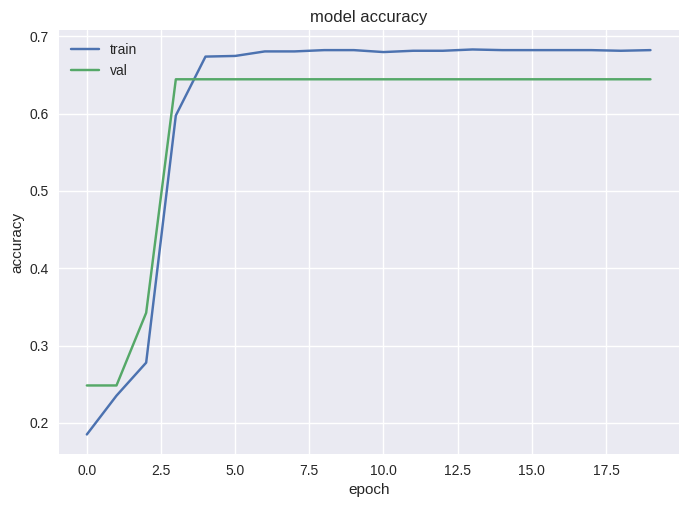

In [51]:

#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for accuracy
plt.plot(student_his.history['acc'])
plt.plot(student_his.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

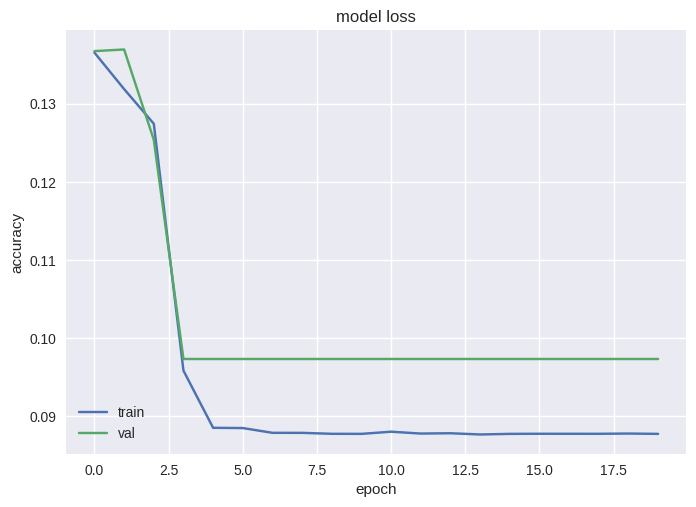

In [52]:

#https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
# summarize history for accuracy
plt.plot(student_his.history['loss'])
plt.plot(student_his.history['val_loss'])
plt.title('model loss')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='lower left')
plt.show()

In [53]:
Y_val_pred = student.predict(x_val)
print(f'The Accuracy on the Validation Set:',accuracy_score(np.argmax(y_val, axis=1), np.argmax(Y_val_pred, axis=1)))


5/5 [==============================] - 0s 32ms/step
The Accuracy on the Validation Set: 0.6442953020134228


In [54]:
#Now let's check my Y_test values
print(f'My Y_test values are:\n' ,y_test)

My Y_test values are:
 [[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 

In [55]:
#Now let's check my predcited values from X_test dataset
import timeit

start = timeit.default_timer()
#Your statements here
y_pred = student.predict(x_test)
print(f'My predicted Y_test values are:\n' ,y_pred)

stop = timeit.default_timer()
print('\nTime: ',stop - start,'sec')

5/5 [==============================] - 0s 33ms/step
My predicted Y_test values are:
 [[0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.21194157 0.57611686 0.33222038 0.33222038 0.33555925]
 [0.21194157 0.211

In [56]:
#Now let's check the accuracy between the original & predicted (Y_test , y_pred)
print(f'My accuracy on Teacher model with ResNet50 on the Test set is:',accuracy_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))


My accuracy on Teacher model with ResNet50 on the Test set is: 0.72


In [57]:

# Print the classification report
print(classification_report( np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1)))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00         6
           2       0.72      1.00      0.84       108

    accuracy                           0.72       150
   macro avg       0.24      0.33      0.28       150
weighted avg       0.52      0.72      0.60       150



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1),pos_label=1)

# roc curve for
random_probs = [0 for i in range(len(np.argmax(y_test, axis=1)))]
p_fpr, p_tpr, _ = roc_curve(np.argmax(y_test, axis=1), random_probs, pos_label=1)

# auc scores
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
print(auc_score1)


# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('\nFalse Positive Rate')
# y label
plt.ylabel('\nTrue Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

ValueError: ignored